### The Coursera Guided Project on Natural Language Processing : Twitter Sentiment Analysis is performed by me following the task provided during the Course.

# Task1 :  Understanding the problem and Business Statement
- NLP Works by converting the words or text into numbers

- These numbers are then used to train a Machine learning model for making predictions
 
- Predictions could be sentiment analysis inferred from social media or from a product review
- ML based sentiment analysis is important for companies to automatically predict whether the customer is happy or not.
-  In our case study we will be analysing thousands of tweets to analyse their sentiments



# Task2 : Importing Libraries and Datasets

- For Downloading the dataset you can download from the followng link  https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech

In [1]:
import pandas as pd # Pandas is used for DataFrame
import numpy as np # Used for numerical Analysis
import seaborn as sns # For visualisation
import matplotlib.pyplot as plt

In [2]:
tweets_df = pd.read_csv('twitter.csv')

In [3]:
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [4]:
# Checking the information of the database
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
# Describing the dataset
tweets_df.describe()

# From the table below we can see that 'id' Column really doesn't make any sense so we will be deleting the column.

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [6]:
# Looking at the tweets of the dataset
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [7]:
#Dropping the id column
new_tweet = tweets_df.drop(['id'], axis=1)

In [8]:
new_tweet #New Dataframe after removing the id column

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


# Task3 : Explore the Dataset

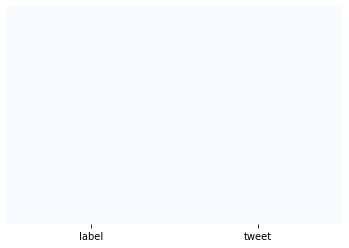

In [9]:
# Checking for null values using seaborn 
sns.heatmap(new_tweet.isnull(), yticklabels= False, cbar= False, cmap = 'Blues')
plt.show()

# All clear image means that the dataset has zero null values in the dataset.

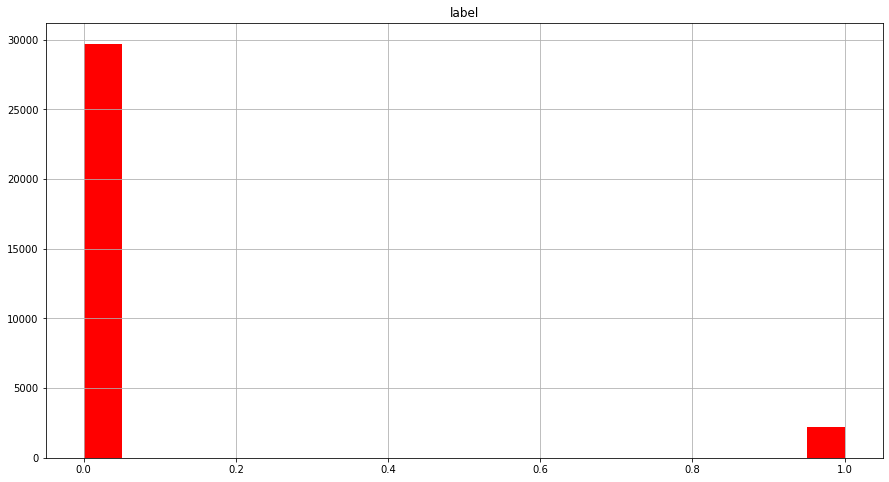

In [10]:
new_tweet.hist(bins=20,figsize=(15,8), color = 'r')
plt.show()

#Looking at the histogram below we can see that the dataset is highly imbalanced

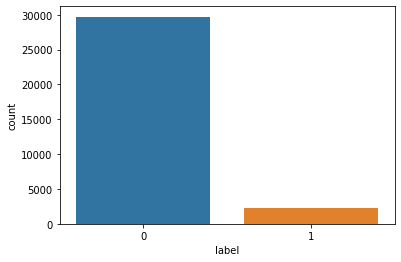

In [11]:
#Plotting a Countplot
sns.countplot(x = 'label', data = new_tweet)
plt.show()

In [12]:
# Checking the length of the tweets
new_tweet['length'] = new_tweet['tweet'].apply(len)

In [13]:
new_tweet

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


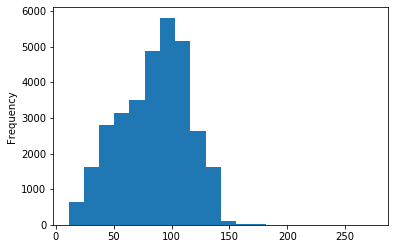

In [14]:
# Checking the distribution of the lengths of tweets
new_tweet['length'].plot(bins = 20 ,kind = 'hist')

In [15]:
# Checking the dataset after adding the new column
new_tweet.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [16]:
# Checking the shortest tweet from the dataset
new_tweet[new_tweet['length'] == 11]['tweet'].iloc[0]

'i love you '

In [17]:
# Checking the longest tweet from the dataset
new_tweet[new_tweet['length'] == 274]['tweet'].iloc[0]

' @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82â\x80¦'

In [18]:
# Checking the tweet with the average length
new_tweet[new_tweet['length'] == 84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [19]:
np.mean(new_tweet['length'])

84.73962830861649

In [20]:
# Applying positive and negative labels to O and 1
positive = new_tweet[new_tweet['label'] == 0]

In [21]:
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [22]:
negative = new_tweet[new_tweet['label'] == 1]

In [23]:
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


# Task4 : Plotting the WordCloud

In [24]:
#Converting the tweets into a list
sentences = new_tweet['tweet'].tolist()

In [25]:
sentences

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 " @user @user welcome here !  i'm   it's so #gr8 ! ",
 ' â\x86\x9d #ireland consume

In [26]:
len(sentences)

31962

In [27]:
# Converting the sentences into a one big string to plot the wordcloud
sentences_as_string = " ".join(sentences)

In [28]:
# sentences_as_string

In [29]:
from wordcloud import WordCloud

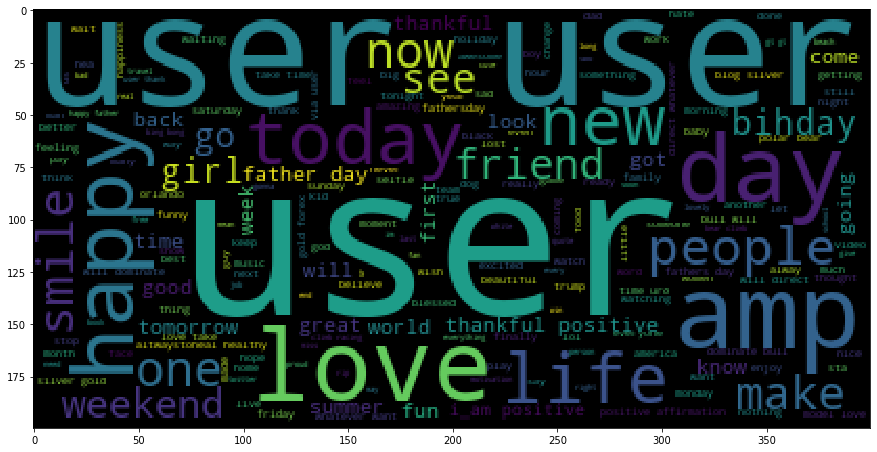

In [30]:
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(sentences_as_string))

In [31]:
# Converting positive dataframe into a list 
positivelist = positive['tweet'].tolist()

In [32]:
positive_as_string = " ".join(positivelist)

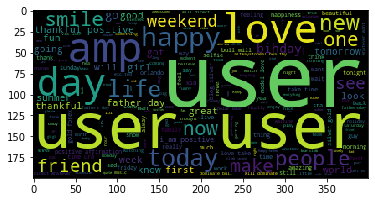

In [33]:
# Plotting the worldcloud for negative and positive dataframe
plt.imshow(WordCloud().generate(positive_as_string))
plt.show()

In [34]:
# Converting negative dataframe into a list 
negativelist = negative['tweet'].tolist()

In [35]:
negative_as_string = " ".join(negativelist)

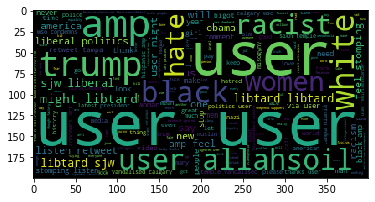

In [36]:
# Plotting the worldcloud for negative dataframe
plt.imshow(WordCloud().generate(negative_as_string))
plt.show()

# Task5 : Performing Data cleaning - Removing punctuation from the text 

In [37]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
example = 'Good Morning Everyone ....:) I am Enjoying NLP in Machine Learning/'

In [39]:
# Making use of list comprehension
clean_example = [char for char in example if char not in string.punctuation]

In [40]:
#clean_example

In [41]:
clean_example = "".join(clean_example)

In [42]:
clean_example

'Good Morning Everyone  I am Enjoying NLP in Machine Learning'

In [43]:
# Another approach to perform same operation by  creating an empty list

new_exmple = []
for char in example:
    if char not in string.punctuation:
        new_exmple.append(char)
new_exmple = "".join(new_exmple)

In [44]:
new_exmple

'Good Morning Everyone  I am Enjoying NLP in Machine Learning'

# Task6 : Performing Data Cleaning: Removing StopWords

In [45]:
# Importing nltk library
import nltk

In [46]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
from nltk.corpus import stopwords
stopwords.words('english')

# These are the common words which occur in the english sentences they are neutral 
# they doesn't depict positive or negative sentiment


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
new_exmple_clean = [word for word in new_exmple.split() if word.lower() not in stopwords.words('english')]

In [49]:
new_exmple_clean # we removed punctuations and stopwords

['Good', 'Morning', 'Everyone', 'Enjoying', 'NLP', 'Machine', 'Learning']

In [50]:
# challenge
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'
mini = [word for word in mini_challenge if word not in string.punctuation]
challenge = "".join(mini)
challenge = [word for word in challenge.split() if word.lower() not in stopwords.words('english') ]
        

In [51]:
challenge

['mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations']

In [52]:
# All the steps are performed to understand the flow of cleaning in text all the steps will be combined and applied
# to the twitter dataset.


# Task7: Performing Count Vectorization

In [53]:
# Performing Sample Tokenization
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This paper is the second paper.','And this is the third one.','Is this the first paper?']

In [54]:
vectorizer = CountVectorizer()
X1 = vectorizer.fit_transform(sample_data)

In [55]:
print(vectorizer.get_feature_names())

['and', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [56]:
print(X1.toarray())

[[0 1 1 0 1 0 1 0 1]
 [0 0 1 0 2 1 1 0 1]
 [1 0 1 1 0 0 1 1 1]
 [0 1 1 0 1 0 1 0 1]]


In [57]:
mini_challenge_cv = ['Hello World','Hello Hello World','Hello World world world']
vectorizer_challenge = CountVectorizer()
X_challenge = vectorizer_challenge.fit_transform(mini_challenge_cv)
vectorizer_challenge.get_feature_names()

['hello', 'world']

In [58]:
vectorizer_challenge.get_feature_names()
print(X_challenge.toarray())

[[1 1]
 [2 1]
 [1 3]]


# Task8 : Creating a flow to remove punctuation, stopwords and then performing tokenisation for the twitter dataset`

In [59]:
def txt_cleaning(message):
    text_punc_removed = [char for char in message if char not in string.punctuation]
    join_text_punc_removed = "".join(text_punc_removed)
    text_stopwords_removed = [word for word in join_text_punc_removed.split() if word.lower() not in stopwords.words('english')]
    return text_stopwords_removed

In [60]:
cleaned_twitter_df = new_tweet['tweet'].apply(txt_cleaning)

In [61]:
print(cleaned_twitter_df[5]) #Cleaned version of the data

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [62]:
print(new_tweet['tweet'][5]) # Original version of the data

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [63]:
# Define the cleaning pipeline we defined earlier
tweet_vectorizer = CountVectorizer(analyzer = txt_cleaning) #before applying count vectorizer but before applying
# we will clean up the message 
tweets_countvectorizer = CountVectorizer(analyzer=txt_cleaning, dtype='uint8').fit_transform(new_tweet['tweet']).toarray()

In [64]:
tweets_countvectorizer.shape

(31962, 47386)

In [65]:
X = tweets_countvectorizer #the above method transforms the text into a bunch of numbers. which will be then applied to a machine learning model.


In [66]:
Y = new_tweet['label']

# Task9 : Applying a Machine Learning Model

In [67]:
X.shape

(31962, 47386)

In [68]:
Y.shape

(31962,)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [70]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train,Y_train)

MultinomialNB()

# Task10 : Assessing the Performance of the model using Confusion Matrix




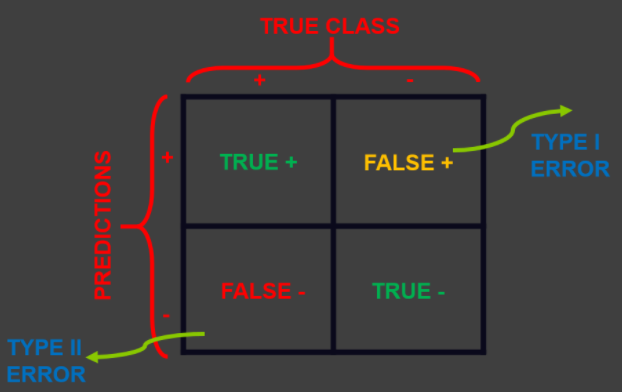

In [71]:
from sklearn.metrics import classification_report, confusion_matrix


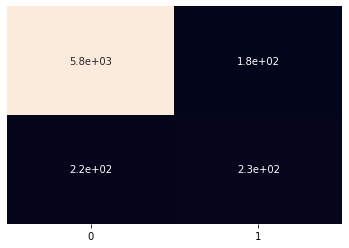

In [72]:
# Predicting the result for the test set
y_pred_twitter = nb_classifier.predict(X_test)
cm_twitter = confusion_matrix(Y_test, y_pred_twitter)
sns.heatmap(cm_twitter, annot=True, cbar=False, yticklabels=False)
plt.show()

In [73]:
# We have an unbalance dataset 
print(classification_report(Y_test,y_pred_twitter))


              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5945
           1       0.56      0.52      0.54       448

    accuracy                           0.94      6393
   macro avg       0.76      0.74      0.75      6393
weighted avg       0.94      0.94      0.94      6393

